probes are 384 channels,channel 0 at the bottom/tip, and 10 'bad' channels

above is an example of a "probe image"  with one metric, the gamma band power. 
we want to generate for each recording, many probe images with differnt metrics, such as:
    1. RMS spike band 300 - 30000 Hz
    2. RMS LFP band < 300 Hz
    3. power in various spectral windows (i.e, gamma); more on wikipedia/the literature
    4. anything else you want to measure that can be one number per channel. and has some structure.

we a 'reference image', which is the same coordinates as the probe image, but contains structure IDs. 
    get this either:
    1. from manual curation or 
    2. by registering a histology track to the CCF and extracting the structure IDs
    
with matching probe images and reference images, train magic comptuer algorithm to put non-trained probe images into CCF coordinates. 

connect to SD1:
    \\SD1
    user: \guest
    password: mindscope1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os,re, glob
%matplotlib inline
%load_ext autoreload
%autoreload 2 
sns.set_style("whitegrid")
import warnings
warnings.filterwarnings('ignore')

from braintv_ephys_dev.workstation.danield import generalephys as ephys
import braintv_ephys_dev.workstation.danield.continuous_traces as traces
import braintv_ephys_dev.workstation.danield.utils as utils

In [2]:
path = '/Volumes/SD1/DanD/M270512/270512_2016-12-16_10-51-44'
anotherfolderfullofdatawithhistology = '/Volumes/SD1/DanD/M310016/localization'
filename = 'experiment1_104-0_0.dat'
phase = 3
bad_channels = []
traces.skip_channels = np.append(traces.npix_p3_reference_channels,bad_channels)

In [18]:
path = '/Volumes/DATA3/temporal/M319891/31082017/M319891_2017-08-31_08-50-22_angled_to3.5'
# = '/Volumes/SD1/DanD/M310016/localization'
filename = 'experiment1_101-0_0.dat'
phase = 3
bad_channels = [84]
traces.skip_channels = np.append(traces.npix_p3_reference_channels,bad_channels)

/Volumes/DATA3/temporal/M319891/31082017/M319891_2017-08-31_08-50-22_angled_to3.5
384


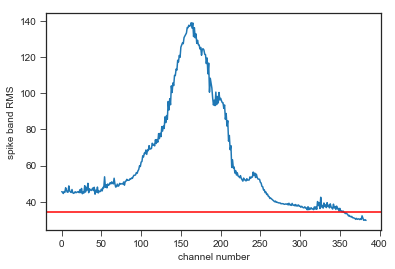

In [20]:
surface_channel_spikeband = traces.get_surface_channel_spikeband(os.path.join(path,
                                filename[:filename.index('.dat')-3]+'1'+filename[filename.index('.dat')-2:]),
                                                  plot=True,
                                                  sampling_rate=30000,
                                                  sigma=4.,
                                                  filter_size=0,
                                                  filter=True,
                                                  probemap=None)
plt.gcf().savefig('/Users/administrator/Dropbox/allenTransfer/temporal_figs/depth_RMS',format='eps')

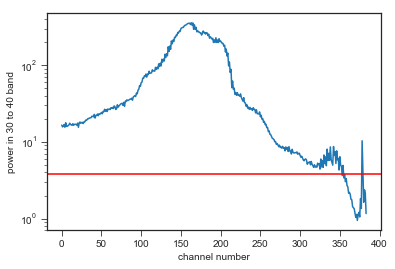

In [19]:
surface_channel_freq = traces.get_surface_channel_freq(os.path.join(path,
                                filename[:filename.index('.dat')-3]+'1'+filename[filename.index('.dat')-2:]),
                                plot=True,
                                frequency_range=[30,40],
                                sigma=.1,
                                filter_size=0,
                                filter=True,
                                probemap=None)
plt.gca().set_yscale('log')

plot something, in this case gamma power, in probe coordinates

In [27]:
np.shape(gamma_)

(374,)

In [5]:
gamma_ = traces.get_probe_freq(os.path.join(path,
                                filename[:filename.index('.dat')-3]+'1'+filename[filename.index('.dat')-2:]),
                                frequency_range=[30,40])

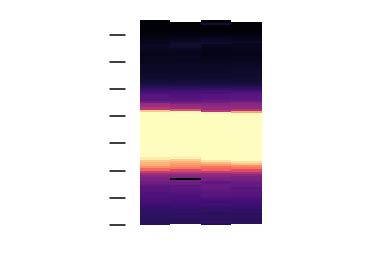

In [7]:
utils.drawPhaseIIIProbe(np.array(gamma_),clim=(0,100), cmap='magma')

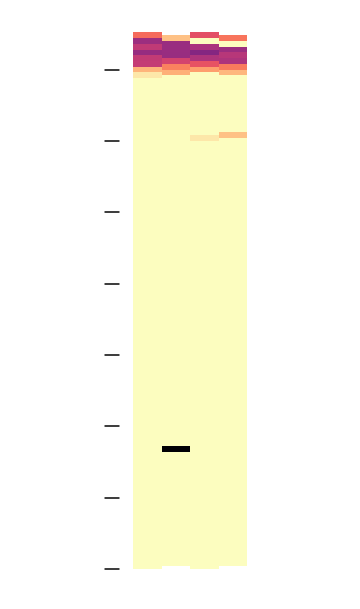

In [11]:
gamma_ = traces.get_probe_freq(os.path.join(path,
                                filename[:filename.index('.dat')-3]+'1'+filename[filename.index('.dat')-2:]),
                                frequency_range=[5,10])
utils.drawPhaseIIIProbe(np.array(gamma_),clim=(0,20), cmap='magma',drawLines=False)
plt.gca().set_aspect(.1)
plt.gcf().set_size_inches(18.5, 10.5)

In [7]:
exps[6]

'/Volumes/SD1/DanD/M310016/localization/M310016_2017-06-15_10-52-16_6'

In [5]:
exps = glob.glob(anotherfolderfullofdatawithhistology+'/M*')
filename = 'experiment1_103-0_0.dat'

In [8]:
path = exps[6]#'/Volumes/SD1/DanD/M310017_2017-06-22_09-23-41'
print path

/Volumes/SD1/DanD/M310016/localization/M310016_2017-06-15_10-52-16_6


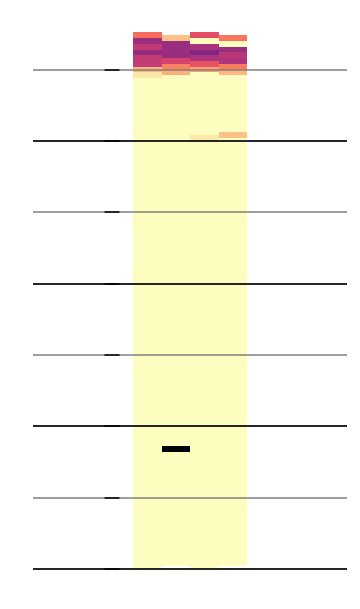

In [10]:
gamma_ = traces.get_probe_freq(os.path.join(path,
                                filename[:filename.index('.dat')-3]+'1'+filename[filename.index('.dat')-2:]),
                                frequency_range=[5,10])
utils.drawPhaseIIIProbe(np.array(gamma_),clim=(0,20), cmap='magma',drawLines=True)
plt.gca().set_aspect(.1)
plt.gcf().set_size_inches(18.5, 10.5)

316


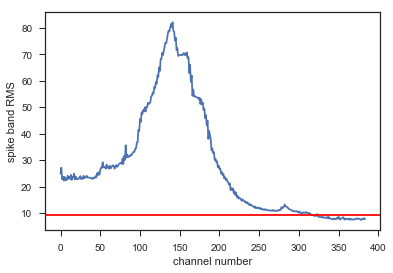

In [10]:
surface_channel_spikeband = traces.get_surface_channel_spikeband(os.path.join(path,
                                filename[:filename.index('.dat')-3]+'1'+filename[filename.index('.dat')-2:]),
                                                  plot=True,
                                                  sampling_rate=30000,
                                                  sigma=7.,
                                                  filter_size=0,
                                                  filter=True,
                                                  probemap=None)
print surface_channel_spikeband

324


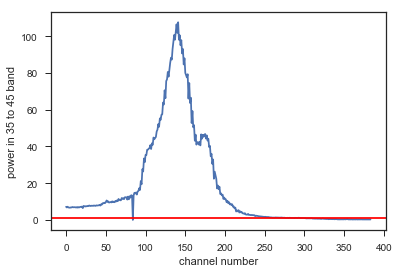

In [11]:
surface_channel_freq = traces.get_surface_channel_freq(os.path.join(path,
                                filename[:filename.index('.dat')-3]+'1'+filename[filename.index('.dat')-2:]),
                                plot=True,
                                frequency_range=[35,45],
                                sigma=20,
                                filter_size=0,
                                filter=True,
                                probemap=None)
print surface_channel_freq

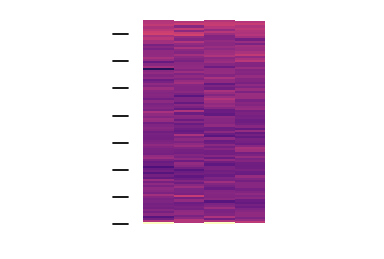

In [14]:
rms_ = traces.get_probe_spikeband(os.path.join(path,
                                filename[:filename.index('.dat')-3]+'0'+filename[filename.index('.dat')-2:]))
utils.drawPhaseIIIProbe(np.array(rms_), cmap='magma',clim=(0,100))

In [111]:
a

{'/Volumes/SD1/DanD/M270512/270512_2016-12-16_10-51-44': {'above': (318, 383),
  'dentate gyrus': (59, 142),
  'medial geniculate': (0, 58),
  'primary visual cortex': (191, 353),
  'subiculum': (143, 174),
  'white matter': (175, 190)},
 '/Volumes/SD1/DanD/M310016/localization/M310016_2017-06-15_08-10-38_1': {'above': (351,
   383),
  'caudate putamen': (21, 171),
  'nucleus accumbens': (0, 20),
  'primary motor cortex': (202, 350),
  'white matter': (172, 201)},
 '/Volumes/SD1/DanD/M310016/localization/M310016_2017-06-15_08-43-17_2': {'above': (346,
   383),
  'caudate putamen': (72, 185),
  'globus pallidus': (0, 71),
  'primary motor cortex': (215, 346),
  'white matter': (186, 214)},
 '/Volumes/SD1/DanD/M310016/localization/M310016_2017-06-15_09-11-15_3': {'above': (332,
   383),
  'fimbria': (0, 43),
  'lateral ventricle': (44, 185),
  'secondary motor cortex': (184, 332),
  'white matter': (161, 183)},
 '/Volumes/SD1/DanD/M310016/localization/M310016_2017-06-15_09-44-15_4': {'LD

'/Volumes/DATA3/localization/M310016/histo/2p5X_4B-ImageExport-32/2p5X_4B-ImageExport-32_c1+2.jpg'

In [18]:
from scipy.ndimage import imread

In [28]:
ims={}
for im in [27,28,29,30,31,32,33]:
    ims[im] = imread(glob.glob(glob.glob('/Volumes/DATA3/localization/M310016/histo/*'+str(im)+'*')[0]+'/*.jpg')[0])

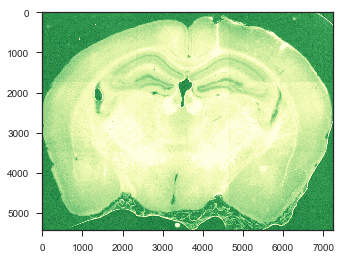

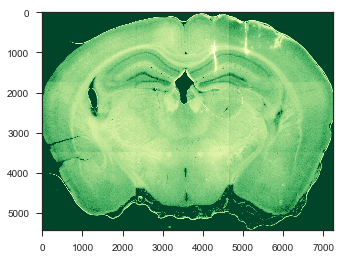

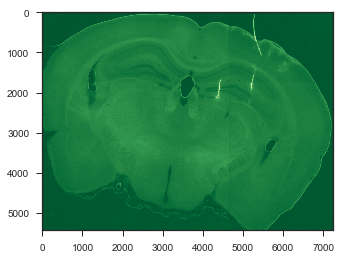

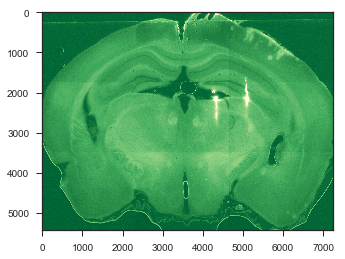

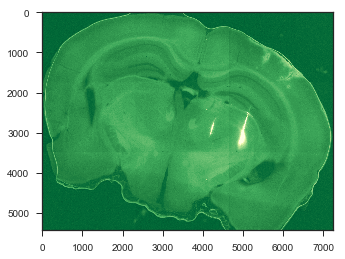

In [64]:
#average_im_g = np.array(ims[28][:,:,2]).flatten()[:39220935]
for im in [28,29,30,31,32]:
    plt.figure()
    #plt.hist(np.array(ims[im][:,:,1]).flatten())
    di = np.array(ims[im][:,:,1]) / np.median(ims[im][:,:,1])
    plt.imshow(di,cmap=plt.cm.YlGn_r)
    #plt.imshow(ims[im][:,:,2],cmap=plt.cm.PuBu_r)
    #plt.colorbar()
    #plt.gcf().savefig('/Volumes/DATA3/localization/'+str(im)+'.eps',format='eps')
    #average_im_g += np.array(ims[im][:,:,2]).flatten()[:39220935]
#average_im_g = average_im_g/6.
#average_im_g.reshape(5421,7236)

(array([  1.20000000e+01,   4.20410000e+05,   8.65511600e+06,
          2.14909000e+05,   3.03660900e+06,   1.10093160e+07,
          1.29076710e+07,   2.50326000e+06,   3.39545000e+05,
          1.34087000e+05]),
 array([  10. ,   34.5,   59. ,   83.5,  108. ,  132.5,  157. ,  181.5,
         206. ,  230.5,  255. ]),
 <a list of 10 Patch objects>)

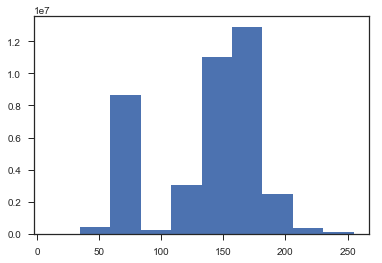

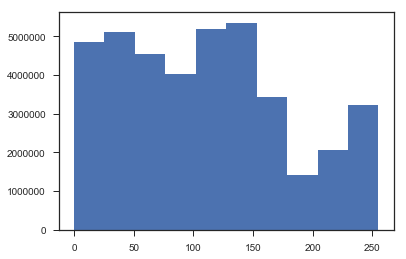

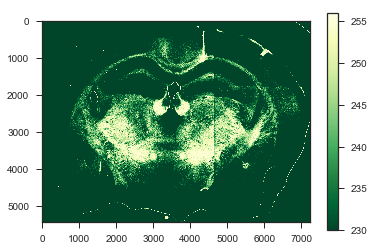

In [77]:
im=28
plt.hist(np.array(ims[im][:,:,2]).flatten())
plt.figure()
plt.imshow(ims[im][:,:,1],clim=(230,256),cmap=plt.cm.YlGn_r)
plt.colorbar()
plt.gcf().savefig('/Volumes/DATA3/localization/'+str(im)+'.eps',format='eps')

In [44]:
average_im_g.reshape(5421,7236)
plt.plt(average_im_g)

ValueError: cannot reshape array of size 39220935 into shape (5421,7236)